In [1]:
pip install geopandas


In [2]:
# Import packages
import pandas as pd
import geopandas as geo
import numpy as np
import seaborn as sns
import networkx as nx
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab
import plotly.offline as py
%matplotlib inline 

In [3]:
# Importing our data
data = pd.read_csv('results.csv', engine="python", encoding='utf-8', error_bad_lines=False)


In [4]:
data=data.drop(columns=["neutral"])
data.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland


**Calcolo numero partite vinte dalle squadre**

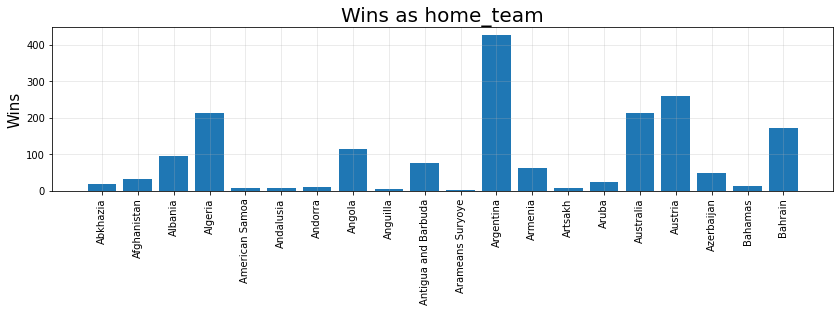

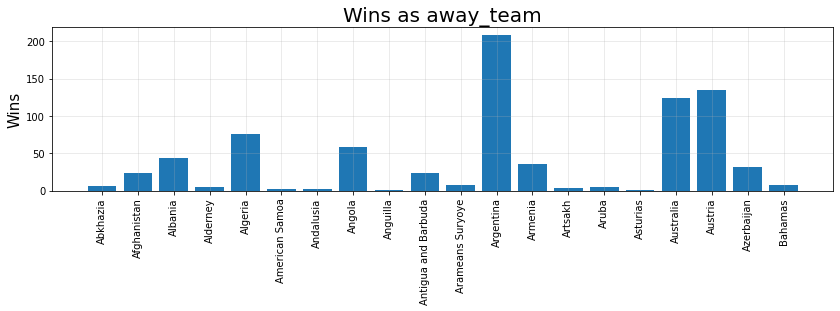

In [5]:
win_ht=data.loc[lambda x: ((x['home_score'] > x['away_score'])),:'away_score']
groupedwin_ht=win_ht.groupby(["home_team"],as_index=False).size()
win_at=data.loc[lambda x: ((x['away_score'] > x['home_score'])),:'away_score']
groupedwin_at=win_at.groupby(["away_team"],as_index=False).size()

plt.figure(figsize=(14,3))
plt.bar(groupedwin_ht['home_team'].head(20),groupedwin_ht['size'].head(20))
plt.title('Wins as home_team', fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('Wins', fontsize=15)
plt.grid(alpha=.3)
plt.margins(.05)
plt.show()

plt.figure(figsize=(14,3))
plt.bar(groupedwin_at['away_team'].head(20),groupedwin_at['size'].head(20))
plt.title('Wins as away_team', fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('Wins', fontsize=15)
plt.grid(alpha=.3)
plt.margins(.05)
plt.show()

**Calcolo numero partite perse dalle squadre** 

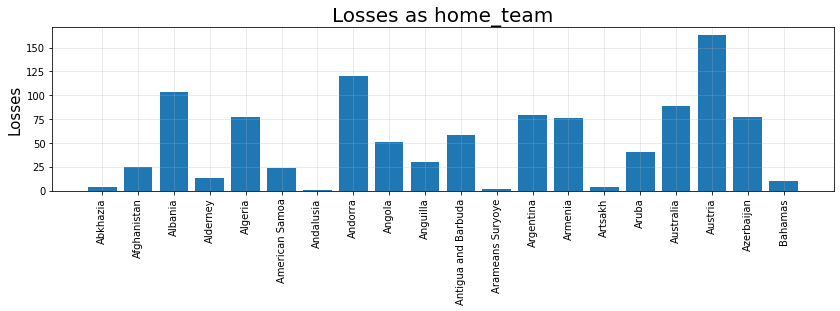

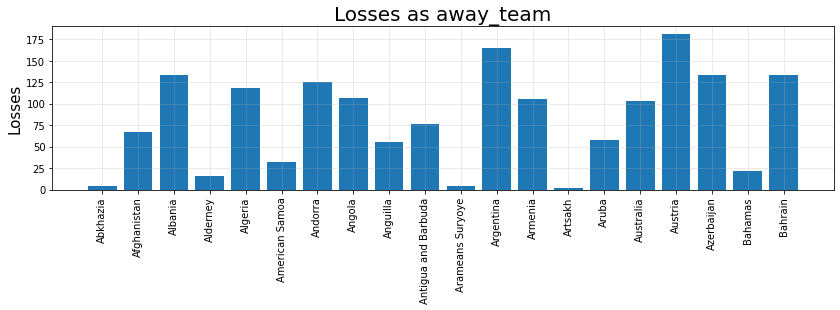

In [6]:
lose_ht=data.loc[lambda x: ((x['home_score'] < x['away_score'])),:'away_score']
groupedlose_ht=lose_ht.groupby(["home_team"],as_index=False).size()
lose_at=data.loc[lambda x: ((x['away_score'] < x['home_score'])),:'away_score']
groupedlose_at=lose_at.groupby(["away_team"],as_index=False).size()

plt.figure(figsize=(14,3))
plt.bar(groupedlose_ht['home_team'].head(20),groupedlose_ht['size'].head(20))
plt.title('Losses as home_team', fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('Losses', fontsize=15)
plt.grid(alpha=.3)
plt.margins(.05)
plt.show()

plt.figure(figsize=(14,3))
plt.bar(groupedlose_at['away_team'].head(20),groupedlose_at['size'].head(20))
plt.title('Losses as away_team', fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('Losses', fontsize=15)
plt.grid(alpha=.3)
plt.margins(.05)
plt.show()

**Correlazione partite in casa e fuori casa**

In [7]:
media_wins_ht=groupedwin_ht.mean()
media_wins_at=groupedwin_at.mean()
print("media vittorie in casa:", float(media_wins_ht))
print("media vittorie fuori casa:", float(media_wins_at))
fattore=float(media_wins_ht/media_wins_at)

print("\nI team quando giocano in casa vincono ",fattore, "volte in piu' rispetto a quando giocano fuori casa")

media vittorie in casa: 93.01724137931035
media vittorie fuori casa: 55.63859649122807

I team quando giocano in casa vincono  1.6718114266950526 volte in piu' rispetto a quando giocano fuori casa


**Confronto fra goals segnati e subiti**

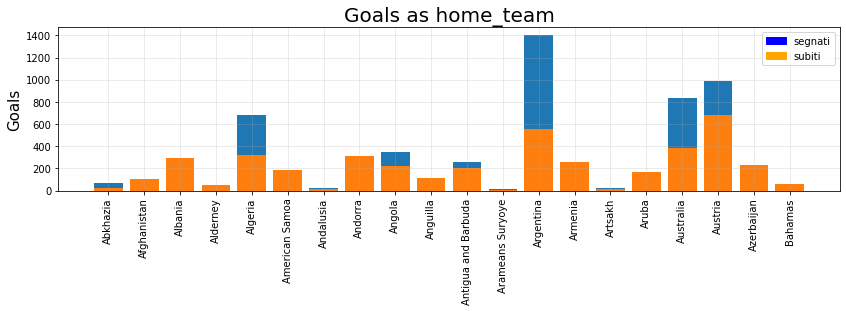

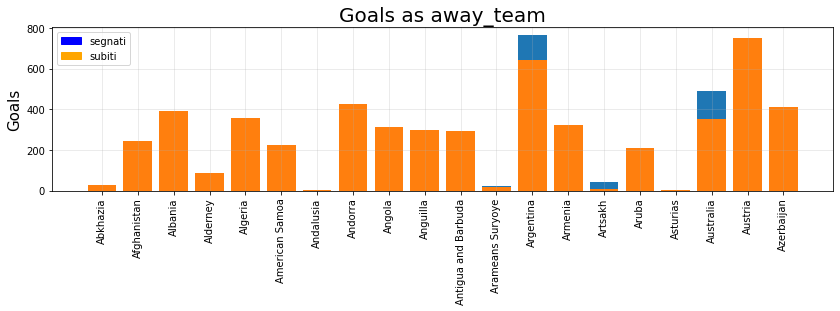

In [8]:
Goals_ht=data.groupby(["home_team"],as_index=False).sum()


Goals_at=data.groupby(["away_team"],as_index=False).sum()


plt.figure(figsize=(14,3))
colors = {'segnati':'blue', 'subiti':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.bar(Goals_ht['home_team'].head(20),Goals_ht['home_score'].head(20))
plt.bar(Goals_ht['home_team'].head(20),Goals_ht['away_score'].head(20))
plt.title('Goals as home_team', fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('Goals', fontsize=15)
plt.grid(alpha=.3)
plt.margins(.05)
plt.show()

plt.figure(figsize=(14,3))
colors = {'segnati':'blue', 'subiti':'orange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.bar(Goals_at['away_team'].head(20),Goals_at['away_score'].head(20))
plt.bar(Goals_at['away_team'].head(20),Goals_at['home_score'].head(20))
plt.title('Goals as away_team', fontsize=20)
plt.xticks(rotation=90)
plt.ylabel('Goals', fontsize=15)
plt.grid(alpha=.3)
plt.margins(.05)
plt.show()

**Frequenza partite nelle varie nazioni**


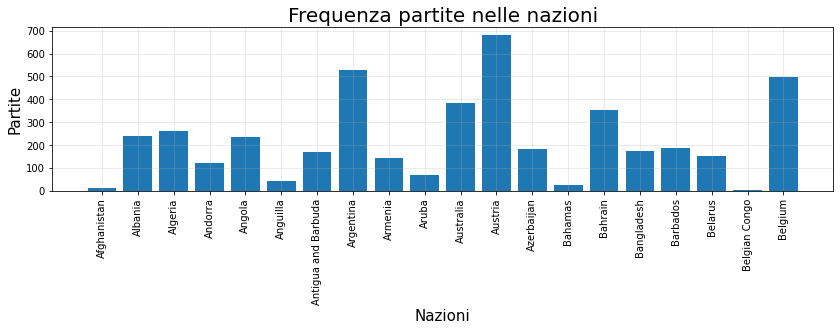

In [9]:
frequenza_Naz=data.groupby(["country"],as_index=False).size()


plt.figure(figsize=(14,3))
plt.bar(frequenza_Naz['country'].head(20),frequenza_Naz['size'].head(20))
plt.title('Frequenza partite nelle nazioni', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Nazioni', fontsize=15)
plt.ylabel('Partite', fontsize=15)
plt.grid(alpha=.3)
plt.margins(.05)
plt.show()

**Grafo dei match tra un sottoinsieme di team**

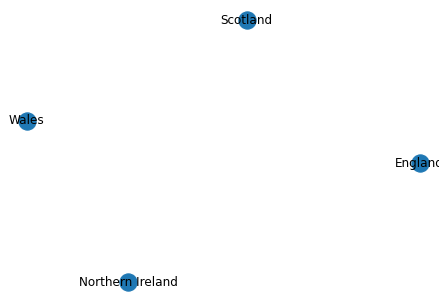

In [10]:
g = nx.Graph()

#aggiungo sottoinsieme di squadre al grafo
g.add_nodes_from(data['home_team'].head(20))

nx.draw(g,with_labels= True)
plt.show()

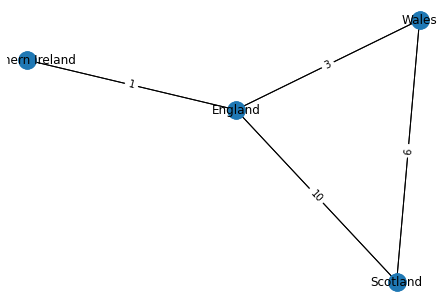

In [11]:
# aggiungo archi pesati che indicano il numero di partite fra i due team
for ht, at in zip(data['home_team'].head(20), data['away_team'].head(20)):
 if(g.has_edge(ht, at)):
  g[ht][at]['partite'] = g[ht][at]['partite'] + 1
 else:
   g.add_edge(ht, at, partite=1)
 


# stampo grafo
pos=nx.spring_layout(g)
pylab.figure(2)
nx.draw(g,pos)
edge_labels=dict([((u,v,),d['partite'])
for u,v,d in g.edges(data=True)])
nx.draw(g, pos, with_labels=True)
nx.draw_networkx_edge_labels(g,pos,edge_labels=edge_labels)
pylab.show()